<a href="https://colab.research.google.com/github/ShainalJ/Detecting-depression-through-tweets_WiDS/blob/main/week_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
import re
import nltk
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/yo/f1/Sentiment Analysis Dataset 2.csv.zip', on_bad_lines = 'skip')

In [ ]:
df=df.drop(['ItemID', 'SentimentSource'], axis=1)

df['SentimentText'] = df['SentimentText'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)

def remove_punctuation(df):
    punctuationfree="".join([i for i in df if i not in string.punctuation])
    return punctuationfree

df['SentimentText']= df['SentimentText'].apply(lambda x:remove_punctuation(x))

df['SentimentText']= df['SentimentText'].apply(lambda x: x.lower())
     

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.SentimentText)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)



Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

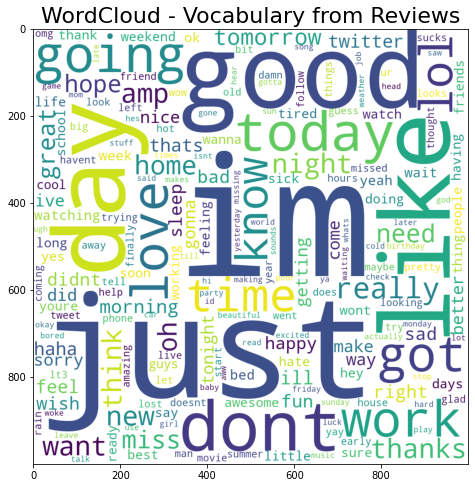

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)


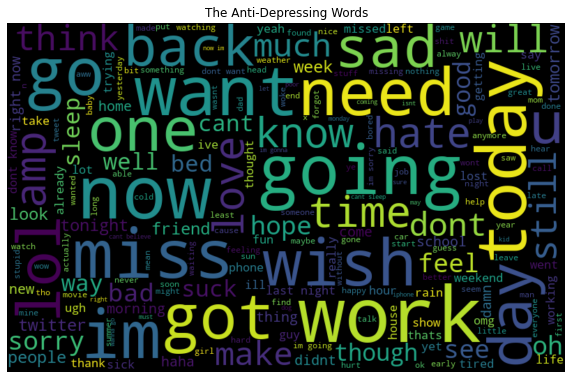

In [ ]:
anti_words =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(anti_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Anti-Depressing Words')
plt.show()


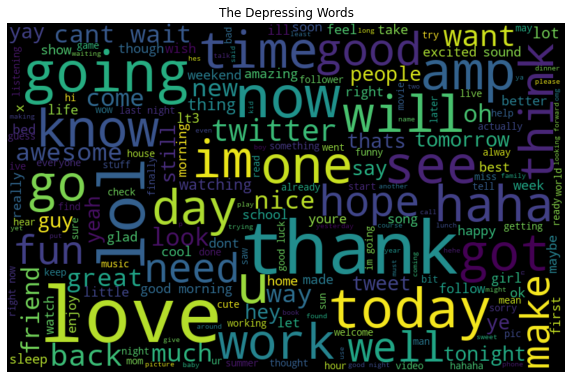

In [ ]:
dep_words =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(dep_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Depressing Words')
plt.show()

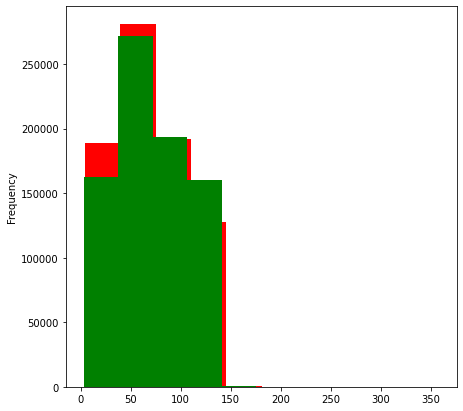

In [ ]:
length_dep = df['SentimentText'][df['Sentiment']==1].str.len().plot.hist(color = 'red', figsize = (7, 7))
length_anti_dep =df['SentimentText'][df['Sentiment']==0].str.len().plot.hist(color = 'green', figsize = (7, 7))

In [ ]:
df['Sentiment'].value_counts()


1    790177
0    788435
Name: Sentiment, dtype: int64

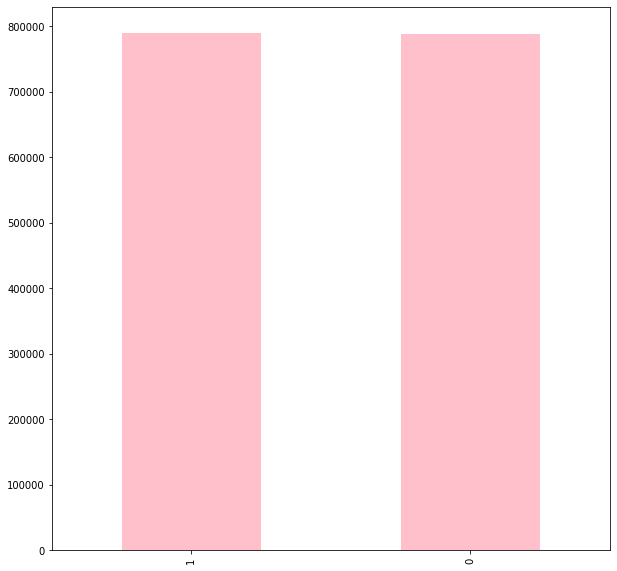

In [ ]:
df['Sentiment'].value_counts().plot.bar(color = 'pink', figsize = (10, 10))


In [ ]:
df.loc[0:15][df['Sentiment'] == 1]

<ipython-input-12-c91ab827b045>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[0:15][df['Sentiment'] == 1]


,Sentiment,SentimentText
2,1,omg its already 730 o
6,1,juuuuuuuuuuuuuuuuussssst chillin
8,1,handed in my uniform today i miss you a...
9,1,hmmmm i wonder how she my number
11,1,thanks to all the haters up in my face a...


In [ ]:
df.loc[0:5][df['Sentiment'] == 0]

<ipython-input-13-fcedac46b3ad>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[0:5][df['Sentiment'] == 0]


,Sentiment,SentimentText
0,0,is so sad for my apl friend
1,0,i missed the new moon trailer
3,0,omgaga im sooo im gunna cry ive be...
4,0,i think mi bf is cheating on me tt
5,0,or i just worry too much


In [ ]:
df[(df['Sentiment'] == 1) & (df['SentimentText'].str.len() ==max(df['SentimentText'][df['Sentiment'] == 1].str.len()))]
     


,Sentiment,SentimentText
195444,1,iannnnn à¹€à¸”à¸µà¹‹à¸¢à¸§à¸­à¸µà¸à¸‹à¸±à¸à¸„à...


In [ ]:
df[(df['Sentiment'] == 0) & (df['SentimentText'].str.len() ==max(df['SentimentText'][df['Sentiment'] == 0].str.len()))]
     

,Sentiment,SentimentText
396369,0,neospace à¹€à¸£à¸·à¹ˆà¸­à¸‡à¸•à¸±à¹‰à¸‡à¸žà¸£à...
